## UP221 Midterm Notebook

Meaghan Woody

Individual Portion of Midterm Notebook

In [1]:
## Part 1: Data set-up and data-cleaning

In [2]:
# Use pandas/geopandas to explore data
import pandas as pd
import geopandas as gpd
import numpy as np

In [36]:
# import census data
census = pd.read_csv('allvars_1.csv', dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    })
census.head(3)

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_B04001_010,PCT_SE_B04001_002,PCT_SE_B04001_003,PCT_SE_B04001_004,PCT_SE_B04001_005,PCT_SE_B04001_006,PCT_SE_B04001_007,PCT_SE_B04001_008,PCT_SE_B04001_009,PCT_SE_B04001_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,1082,73.04,55.71,3.01,0.20,9.72,0.0,0.20,4.21,26.96
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,362,91.31,69.21,1.83,0.00,13.98,0.0,0.29,6.00,8.69
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,1463,57.97,42.66,0.00,1.32,12.44,0.0,0.14,1.41,42.03


In [37]:
# view data -- (2498,86)
census.shape

(2498, 86)

In [49]:
# Locate the variables that might be interesting for analysis

# 1. Foreign-Born Status (is there a large proportion captured in the Census?)
# 2. Unmployment Status for Total Population 16 Years and Over
# 3. Hispanic or Latino by Race (Collapsed Version)

# Condense to our variables
print(census.columns)
keep= ['Geo_FIPS', 'SE_A06001_003', 'SE_A17002_006', 'SE_B04001_010']
# corresponding to FIPS and #1,2,3 above

# new dataset with only those vars
census_new=census[keep]
census_new.columns = ['FIPS','Foreign-Born', 'Unmployment', 'Hispanic or Latinx']
census_new.head(3)

Index(['Geo_FIPS', 'Geo_QName', 'Geo_STUSAB', 'Geo_SUMLEV', 'Geo_GEOCOMP',
       'Geo_US', 'Geo_REGION', 'Geo_DIVISION', 'Geo_STATE', 'Geo_COUNTY',
       'Geo_COUSUB', 'Geo_PLACE', 'Geo_TRACT', 'Geo_BLKGRP', 'Geo_CONCIT',
       'Geo_AIANHH', 'Geo_AIANHHFP', 'Geo_AIHHTLI', 'Geo_AITS', 'Geo_ANRC',
       'Geo_CBSA', 'Geo_CSA', 'Geo_METDIV', 'Geo_MACC', 'Geo_MEMI',
       'Geo_NECTA', 'Geo_CNECTA', 'Geo_NECTADIV', 'Geo_UA', 'Geo_CDCURR',
       'Geo_SLDU', 'Geo_SLDL', 'Geo_ZCTA3', 'Geo_ZCTA5', 'Geo_SUBMCD',
       'Geo_SDELM', 'Geo_SDSEC', 'Geo_SDUNI', 'Geo_UR', 'Geo_PCI', 'Geo_PUMA5',
       'Geo_NAME', 'Geo_BTTR', 'Geo_BTBG', 'Geo_PLACESE', 'SE_A06001_001',
       'SE_A06001_002', 'SE_A06001_003', 'SE_A06001_004', 'SE_A06001_005',
       'PCT_SE_A06001_002', 'PCT_SE_A06001_003', 'PCT_SE_A06001_004',
       'PCT_SE_A06001_005', 'SE_A17002_001', 'SE_A17002_002', 'SE_A17002_003',
       'SE_A17002_004', 'SE_A17002_005', 'SE_A17002_006', 'SE_A17002_007',
       'PCT_SE_A17002_002', 'PCT_

,FIPS,Foreign-Born,Unmployment,Hispanic or Latinx
0,06037101110,1407,177,1082
1,06037101122,1839,220,362
2,06037101220,1552,247,1463


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


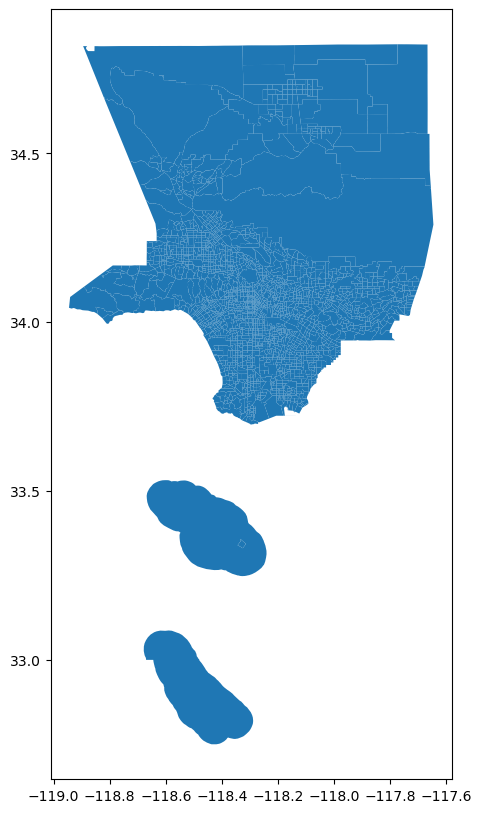

In [50]:
# Prep Mapping 

# import 2020 census tracts (source: LA Times), inspect using plot
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.plot(figsize=(12,10))

# condense the dataset geomtry and CT20	
tracts = tracts[['CT20','geometry']]

# add FIPS
tracts['FIPS'] ='06' + '037' + tracts['CT20']
# error code 

tracts.head()
# FIPS is in the last column

In [51]:
# merge our data: 2020 census tract geometry with social explorer
ctmap=tracts.merge(census_new,on="FIPS")
ctmap.head()
# we have CT20, geomtery, FIPS, our 3 variables

,CT20,geometry,FIPS,Foreign-Born,Unmployment,Hispanic or Latinx
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1407,177,1082
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,1839,220,362
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,1552,247,1463
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,2015,79,1204
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,1720,164,1295


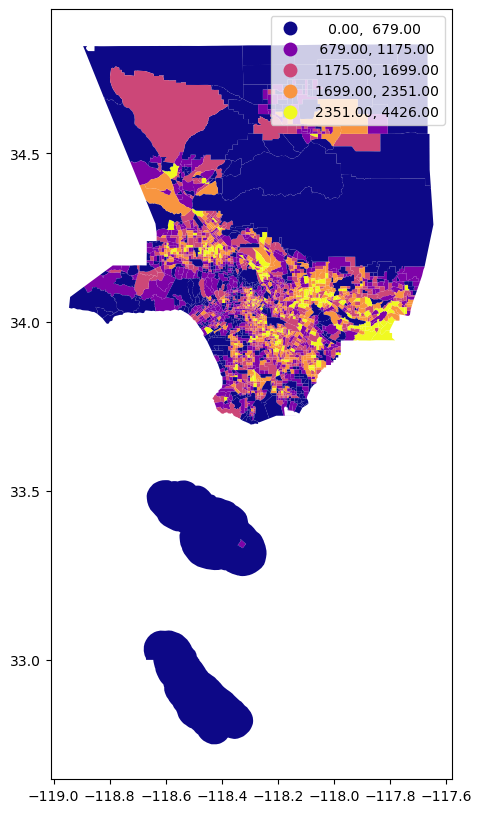

In [56]:
# Foreign-Born Population
ctmap.plot(figsize=(12,10),
                 column='Foreign-Born',
                 cmap='plasma',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

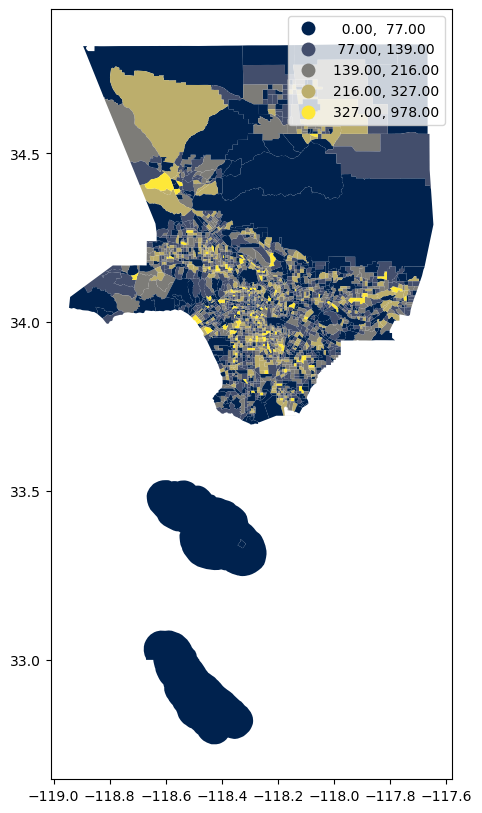

In [59]:
# Unemployment Status
ctmap.plot(figsize=(12,10),
                 column='Unmployment',
                 cmap='cividis',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

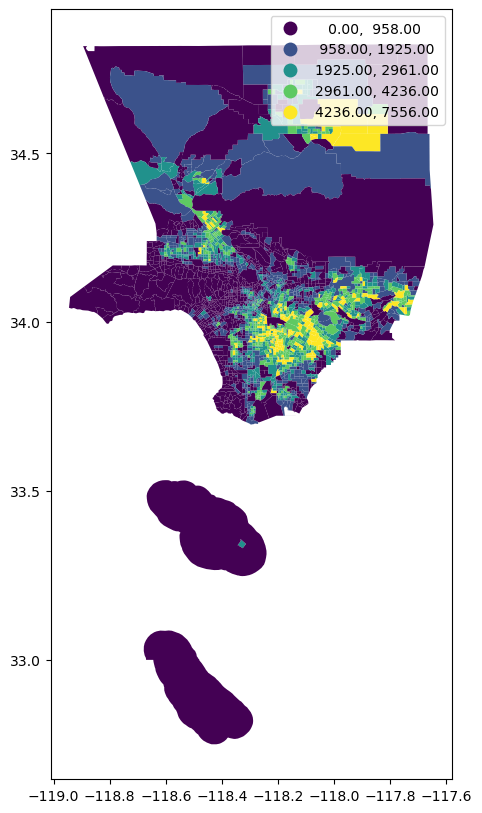

In [60]:
# Hispanic / Latinx
ctmap.plot(figsize=(12,10),
                 column='Hispanic or Latinx',
                 legend=True, 
                 scheme='NaturalBreaks')

## Contribution to the Group

I re-formulated our research question based on Chris' feedback and rewrote our research proposal with a pared-down research approach. I planned out the maps and charts that we would present and add to our midterm and delegated tasks. I helped format, create slides, and organize the presentation.

I created additional maps, presented in this notebook, in case the ones we have did not work out.